### The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into training and test sets ( 2.5 points)
5. Normalize the train and test data (5 points)
6. Initialize & build the model (10 points)
7. Predict the results using 0.5 as a threshold (5 points)
8. Print the Accuracy score and confusion matrix (2.5 points)

### Expectation: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
bank_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/bank.csv')

In [65]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
print("1. There are total 14 columns.")
print("2. There are 3 categorical columns, 'surname', 'Geography' and 'Gender'.")
print("3. There are 2 float type columns, 'Balance' and 'EstimatedSalary' means contiuous values.")
print("4. There are 2 coulmns 'RowNumber', 'CustomerId' which will not add any value to our model. So, we will drop them")
print("5. There seems to be no missing values")

1. There are total 14 columns.
2. There are 3 categorical columns, 'surname', 'Geography' and 'Gender'.
3. There are 2 float type columns, 'Balance' and 'EstimatedSalary' means contiuous values.
4. There are 2 coulmns 'RowNumber', 'CustomerId' which will not add any value to our model. So, we will drop them
5. There seems to be no missing values


In [0]:
# Let's drop un-necessary columns
bank_data.drop(['RowNumber', 'CustomerId'], inplace=True, axis=1)

In [21]:
# Let's check if there are any missing values
bank_data.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
print("There are no missing values")

There are no missing values


In [23]:
# Let's check if there is any data imbalance
bank_data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
print("1. We can see that there is high imbalance of Classes.")
print("2. We have more 0 class than 1 which will definately affect the churn prediction")

1. We can see that there is high imbalance of Classes.
2. We have more 0 class than 1 which will definately affect the churn prediction


In [25]:
bank_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4
HasCrCard,10000,NaN,NaN,NaN,0.7055,0.45584,0,0,1,1,1
IsActiveMember,10000,NaN,NaN,NaN,0.5151,0.499797,0,0,1,1,1


In [26]:
print("1. There are 2932 'surnames', out of which 'Smith' has the highest occurrence of 32")
print("2. There are 3 coutries included in this data as 'Geography', out of which 'France has the highest number of customers'")
print("3. Average age of customers is approximately 39 years")
print("4. Average 'Tenure' of customers is around 5 years")
print("5. Average 'Balance' in customer's account is around 76485")
print("6. Average 'Salary' of a customer is around 100000")
print("7. Overall data seems to highly skewed.")

1. There are 2932 'surnames', out of which 'Smith' has the highest occurrence of 32
2. There are 3 coutries included in this data as 'Geography', out of which 'France has the highest number of customers'
3. Average age of customers is approximately 39 years
4. Average 'Tenure' of customers is around 5 years
5. Average 'Balance' in customer's account is around 76485
6. Average 'Salary' of a customer is around 100000
7. Overall data seems to highly skewed.


In [67]:
# Lets Encode the Categorical variables
print("We will use Lable Encoding as there are many unique values for 'Surname'")

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank_data['Surname'] = encoder.fit_transform(bank_data['Surname'])
bank_data['Geography'] = encoder.fit_transform(bank_data['Geography'])
bank_data['Gender'] = encoder.fit_transform(bank_data['Gender'])

bank_data.head(10)

We will use Lable Encoding as there are many unique values for 'Surname'


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,537,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,177,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,2000,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,1146,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,1081,684,0,1,27,2,134603.88,1,1,1,71725.73,0


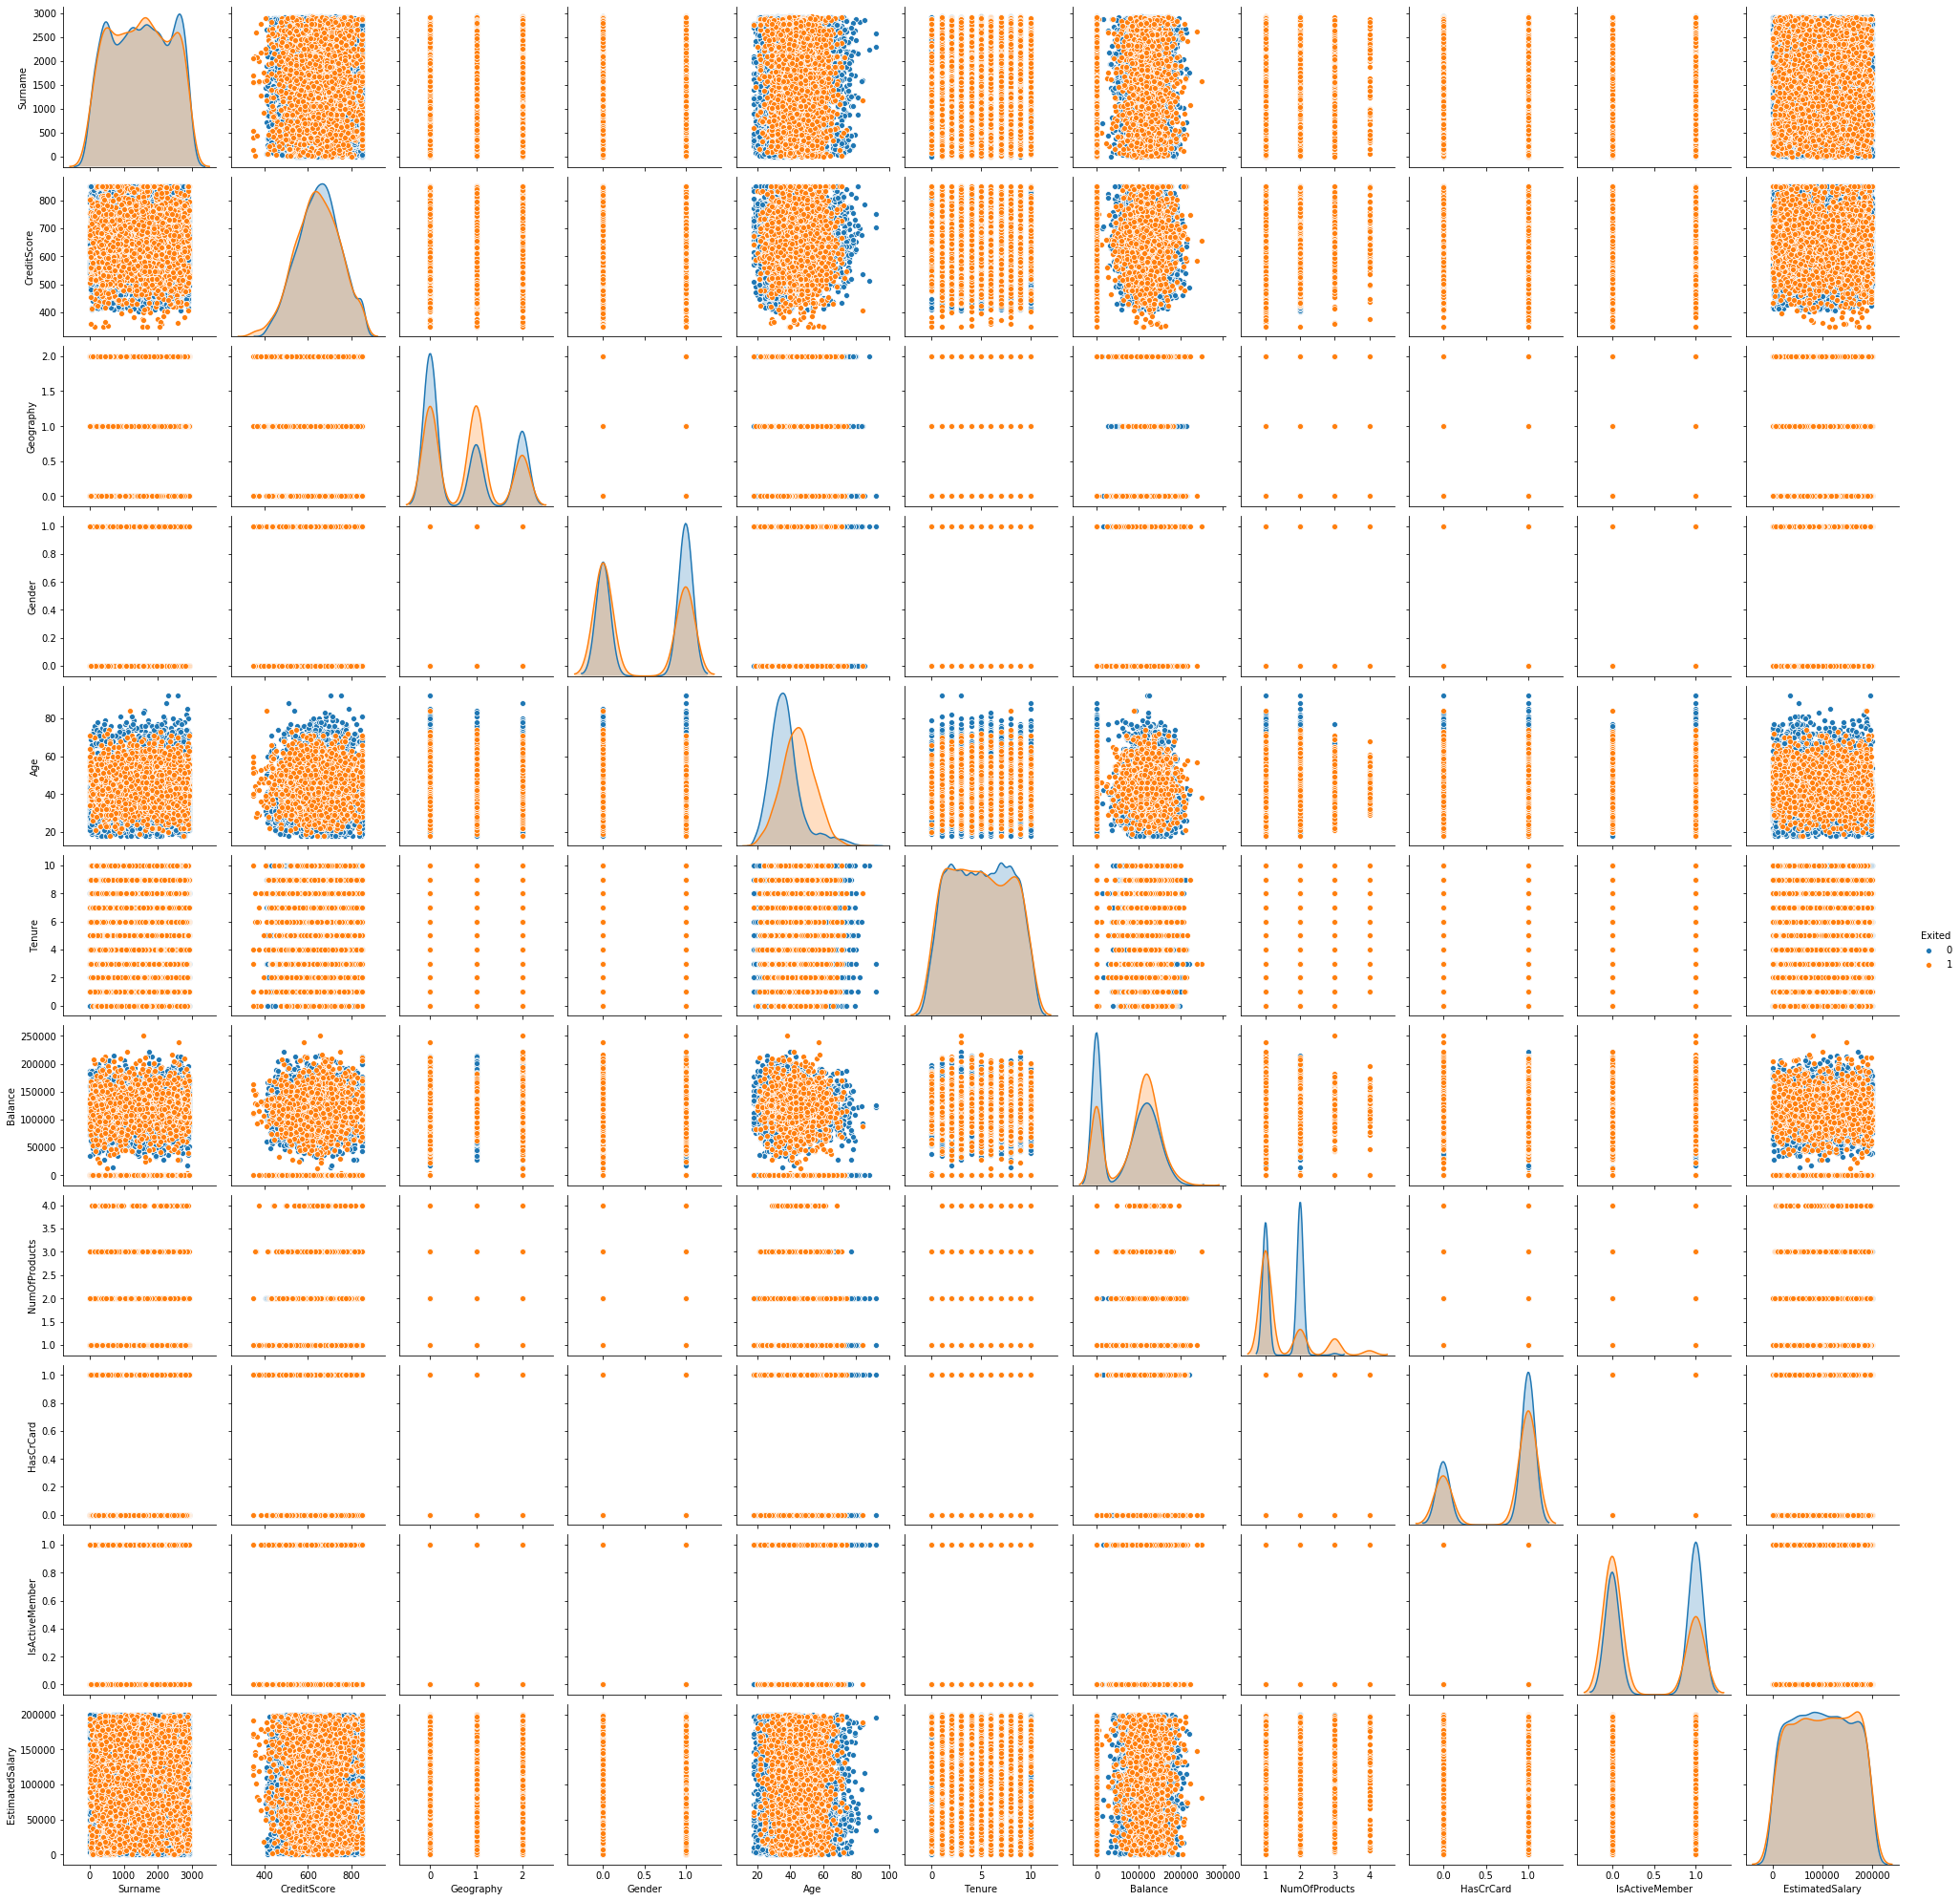

In [28]:
# Let's check distribution of various columns
sns.pairplot(bank_data, diag_kind='kde', hue='Exited')

In [29]:
print("1. Data distribution is almost same for both the classes.")
print("2. Almost all columns are multinomial. There seems to exist 2 or more clustures in the data.")
print("3. Almost all columns has no linear relation between them. So, neuaral networks might not give good results at least without some transformation.")
print("4. Data is nearly normally distributed but there seems to exist a few outliers.")

1. Data distribution is almost same for both the classes.
2. Almost all columns are multinomial. There seems to exist 2 or more clustures in the data.
3. Almost all columns has no linear relation between them. So, neuaral networks might not give good results at least without some transformation.
4. Data is nearly normally distributed but there seems to exist a few outliers.


In [30]:
# Let's check Skewness
bank_data.skew()

Surname           -0.022050
CreditScore       -0.071607
Geography          0.500916
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [31]:
print("1. There seems to not much skewness except column 'Age'")
print("2. We will still scale the data. But before that we will split train and test to avoid data leakage")

1. There seems to not much skewness except column 'Age'
2. We will still scale the data. But before that we will split train and test to avoid data leakage


In [0]:
# Splitting Test and Train data
from sklearn.model_selection import train_test_split
X = bank_data.drop('Exited', axis=1)
y = bank_data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


In [0]:
# Apply Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bank_train_data_scaled = scaler.fit_transform(X_train)
bank_test_data_scaled = scaler.transform(X_test)

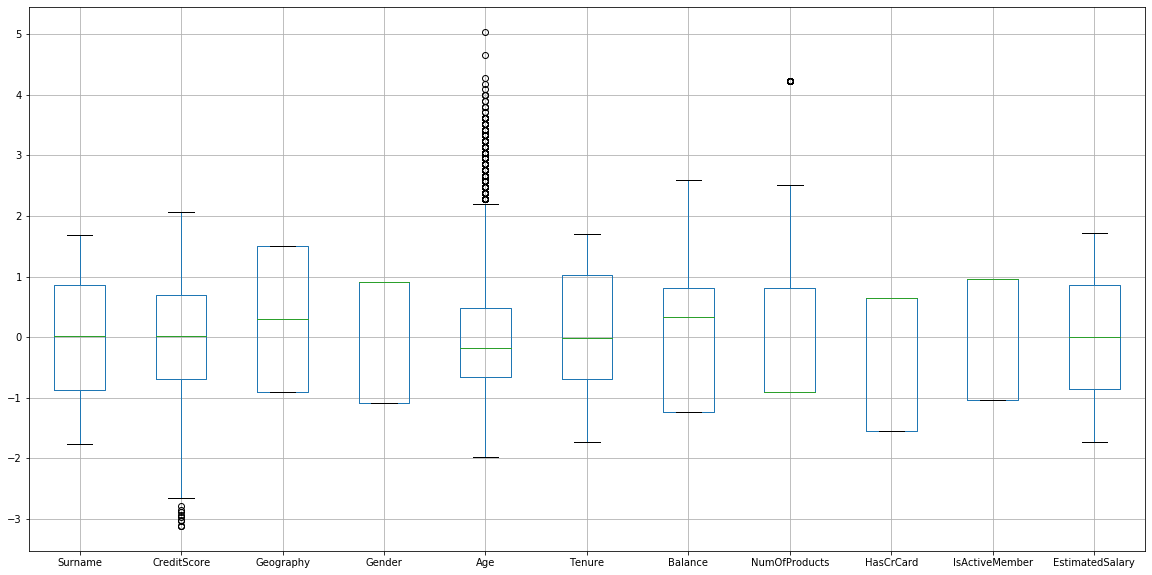

In [72]:
# Let's check if there are any outliers
pd.DataFrame(bank_train_data_scaled, columns=X_train.columns).boxplot(figsize=(20,10))

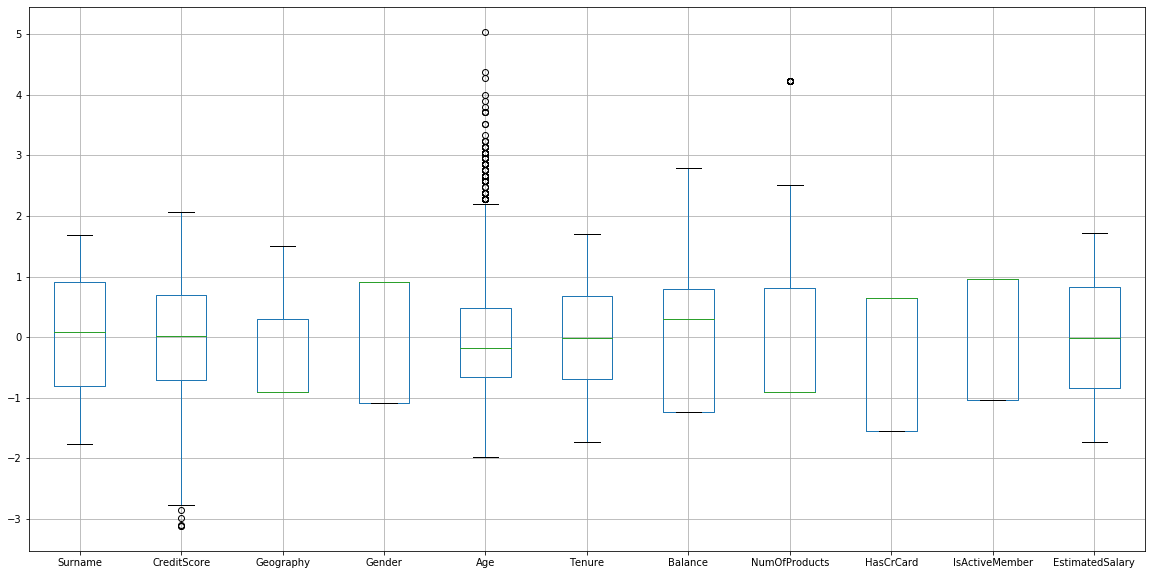

In [36]:
# Let's check if there are any outliers
pd.DataFrame(bank_test_data_scaled, columns=X_test.columns).boxplot(figsize=(20,10))

In [37]:
print("We can see there are many Outliers in 'Age', 'CreditScore' and 'NumOfProducts'")

We can see there are many Outliers in 'Age', 'CreditScore' and 'NumOfProducts'


In [0]:
# Define function to detect Outliers

# Initialize the lists
list_count_outlier_above = list()
list_count_outlier_below = list()
list_column = list()

def initializeTheLists():
    list_count_outlier_above = list()
    list_count_outlier_below = list()
    list_column = list()
    
#Identifying columns with outlier   
def identifyAndTreatOutliers(column, data, handle=False):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 -Q1
    above = Q3 + 1.5*IQR
    below = Q1 - 1.5*IQR
    
    if (handle):
        median = np.median(data.loc[~((data > above) & (data < below))])
        data.loc[data > above] = median
        data.loc[data < below] = median
        print("All Outliers have been replaced with it's median for column: '{0}'".format(column))
    else: 
        count_outlier_above = data.loc[data > above].count()
        count_outlier_below = data.loc[data < below].count()

        # If there are no outliers then do nothing
        if ((count_outlier_above == 0) & (count_outlier_below == 0)) :
            return 0

        print("Column: '{0}' has outliers".format(column))
        list_count_outlier_above.append(count_outlier_above)
        list_count_outlier_below.append(count_outlier_below)
        list_column.append(column)

In [76]:
# Check Outliers in training Data
initializeTheLists()
for column in X.columns:
    identifyAndTreatOutliers(column, pd.DataFrame(bank_train_data_scaled, columns=X_train.columns)[column])
    
# Outlier DataFrame
outlier_train_df = pd.DataFrame()
outlier_train_df['Column'] = list_column
outlier_train_df['Count_outlier_above'] = list_count_outlier_above
outlier_train_df['Count_outlier_below'] = list_count_outlier_below
outlier_train_df

Column: 'CreditScore' has outliers
Column: 'Age' has outliers
Column: 'NumOfProducts' has outliers


,Column,Count_outlier_above,Count_outlier_below
0,CreditScore,0,10
1,Age,112,0
2,NumOfProducts,46,0


In [77]:
# Check Outliers in test Data
initializeTheLists()
for column in X.columns:
    identifyAndTreatOutliers(column, pd.DataFrame(bank_test_data_scaled, columns=X_test.columns)[column])
    
# Outlier DataFrame
outlier_test_df = pd.DataFrame()
outlier_test_df['Column'] = list_column[3:]
outlier_test_df['Count_outlier_above'] = list_count_outlier_above[3:]
outlier_test_df['Count_outlier_below'] = list_count_outlier_below[3:]
outlier_test_df

Column: 'CreditScore' has outliers
Column: 'Age' has outliers
Column: 'NumOfProducts' has outliers


,Column,Count_outlier_above,Count_outlier_below
0,CreditScore,0,5
1,Age,55,0
2,NumOfProducts,14,0


In [45]:
print("1. There are large number of outliers in column 'Age' but less in other columns.")
print("2. Since there are 10000 enries and less than 2% Outliers, we can use median to handle them")

1. There are large number of outliers in column 'Age' but less in other columns.
2. Since there are 10000 enries and less than 2% Outliers, we can use median to handle them


In [79]:
# Handling Outliers
X_train_data_scaled = pd.DataFrame(bank_train_data_scaled, columns=X_train.columns)
X_test_data_scaled = pd.DataFrame(bank_test_data_scaled, columns=X_test.columns)
for column in outlier_train_df.Column:
    identifyAndTreatOutliers(column, X_train_data_scaled[column], handle=True)
    identifyAndTreatOutliers(column, X_test_data_scaled[column], handle=True)

All Outliers have been replaced with it's median for column: 'CreditScore'
All Outliers have been replaced with it's median for column: 'CreditScore'
All Outliers have been replaced with it's median for column: 'Age'
All Outliers have been replaced with it's median for column: 'Age'
All Outliers have been replaced with it's median for column: 'NumOfProducts'
All Outliers have been replaced with it's median for column: 'NumOfProducts'


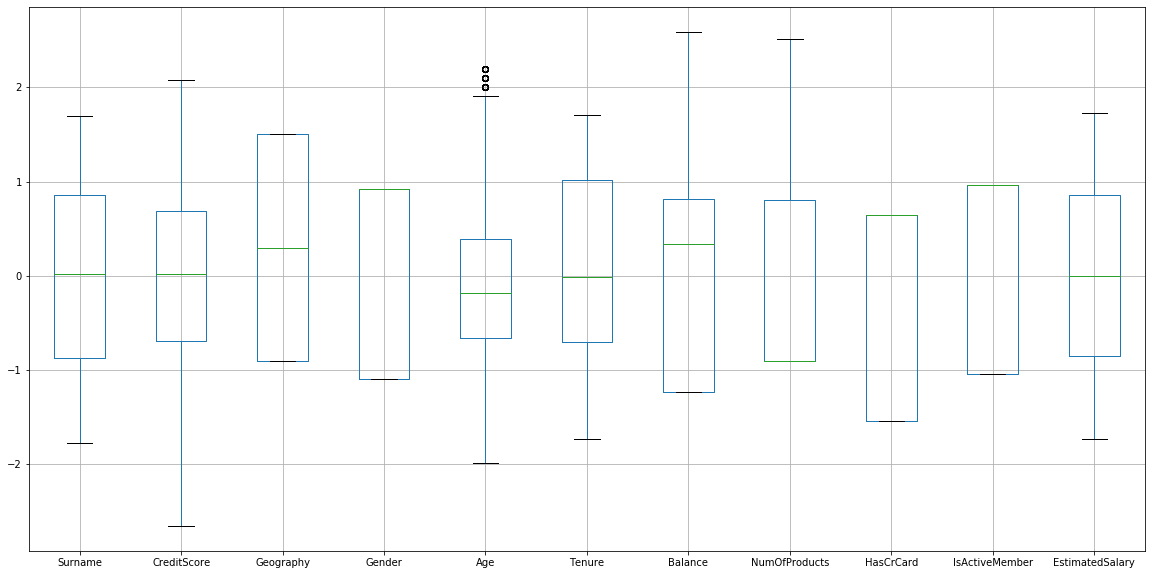

In [48]:
# Let's check if there are any outliers
X_train_data_scaled.boxplot(figsize=(20,10))

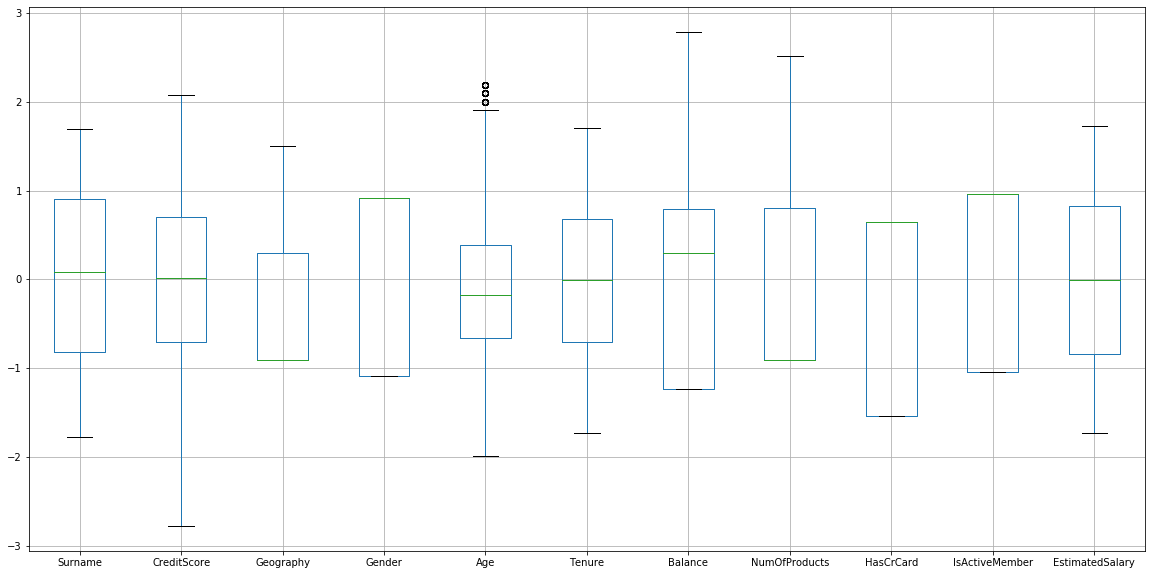

In [49]:
# Let's check if there are any outliers
X_test_data_scaled.boxplot(figsize=(20,10))

In [80]:
for column in X.columns:
    identifyAndTreatOutliers(column, X_train_data_scaled[column])
# Outlier DataFrame
outlier_train_df = pd.DataFrame()
outlier_train_df['Column'] = list_column
outlier_train_df['Count_outlier_above'] = list_count_outlier_above
outlier_train_df['Count_outlier_below'] = list_count_outlier_below
outlier_train_df

Column: 'Age' has outliers


,Column,Count_outlier_above,Count_outlier_below
0,Age,91,0


In [83]:
for column in X.columns:
    identifyAndTreatOutliers(column, X_test_data_scaled[column])
# Outlier DataFrame
outlier_test_df = pd.DataFrame()
outlier_test_df['Column'] = list_column
outlier_test_df['Count_outlier_above'] = list_count_outlier_above
outlier_test_df['Count_outlier_below'] = list_count_outlier_below
outlier_test_df

Column: 'Age' has outliers


,Column,Count_outlier_above,Count_outlier_below
0,Age,38,0


In [53]:
print("We can see that now almost all outliers have been handled")

We can see that now almost all outliers have been handled


In [54]:
X_train_data_scaled.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.150089,-0.212665,-0.904847,-1.090352,-0.275584,-1.044043,0.535759,-0.902887,0.647980,0.961594,-0.885624
1,1.521977,2.072829,0.300697,0.917135,-0.085732,-0.699815,-0.354525,-0.902887,0.647980,0.961594,0.690326
2,-1.525141,-0.036059,0.300697,-1.090352,1.148307,-1.388270,0.685343,0.807589,-1.543257,-1.039940,-0.782345
3,-0.193429,-0.306163,0.300697,0.917135,0.673677,0.332868,1.027523,-0.902887,-1.543257,-1.039940,-1.134829
4,-1.067070,-1.521630,1.506242,-1.090352,0.673677,-1.044043,1.391352,-0.902887,0.647980,0.961594,1.123662


In [55]:
X_test_data_scaled.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.194610,0.691144,1.506242,0.917135,-0.370510,-1.388270,-1.234987,2.518064,-1.543257,-1.039940,1.290574
1,-1.673897,0.275599,-0.904847,-1.090352,-0.180658,1.021323,-1.234987,0.807589,0.647980,0.961594,0.924388
2,0.571597,1.428735,-0.904847,-1.090352,-0.560362,-0.011360,-1.234987,0.807589,-1.543257,-1.039940,0.290721
3,-0.315030,-1.178806,-0.904847,-1.090352,1.338159,-0.699815,-1.234987,-0.902887,0.647980,0.961594,-0.151690
4,0.825425,0.691144,1.506242,-1.090352,0.009194,0.332868,-1.234987,0.807589,0.647980,-1.039940,-0.119355


In [86]:
print(X_train_data_scaled.dtypes)
print(y_train.dtypes)
print(X_test_data_scaled.dtypes)
print(y_test.dtypes)

Surname            float64
CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object
int64
Surname            float64
CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object
int64


In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, BatchNormalization, LeakyReLU

In [0]:
X_train_data_scaled = X_train_data_scaled.to_numpy(copy=True)
X_test_data_scaled = X_test_data_scaled.to_numpy(copy=True)
y_train = tf.keras.utils.to_categorical(y_train.to_numpy(copy=True))
y_test = tf.keras.utils.to_categorical(y_test.to_numpy(copy=True))

In [96]:
# Initialize Sequential model with basic layers
model1 = Sequential()

# Add Dense Layer which takes 11 types of Features
model1.add(Dense(11, input_dim=11))

# Normalize the data
model1.add(BatchNormalization())

# Add Dense Layer which provides 2 Outputs after applying softmax
model1.add(Dense(2, activation='softmax'))

# Compile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
callback_list = [early_stopping]

# Train the model
model1.fit(X_train_data_scaled, y_train, batch_size=32, epochs=100, validation_data=(X_test_data_scaled, y_test), callbacks=callback_list)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 182us/sample - loss: 0.5588 - accuracy: 0.7323 - val_loss: 0.4311 - val_accuracy: 0.8107
Epoch 2/100
7000/7000 [==============================] - 1s 121us/sample - loss: 0.4287 - accuracy: 0.8179 - val_loss: 0.4179 - val_accuracy: 0.8203
Epoch 3/100
7000/7000 [==============================] - 1s 116us/sample - loss: 0.4239 - accuracy: 0.8207 - val_loss: 0.4165 - val_accuracy: 0.8217
Epoch 4/100
7000/7000 [==============================] - 1s 120us/sample - loss: 0.4256 - accuracy: 0.8201 - val_loss: 0.4163 - val_accuracy: 0.8217
Epoch 5/100
7000/7000 [==============================] - 1s 132us/sample - loss: 0.4241 - accuracy: 0.8203 - val_loss: 0.4163 - val_accuracy: 0.8210
Epoch 6/100
7000/7000 [==============================] - 1s 130us/sample - loss: 0.4227 - accuracy: 0.8214 - val_loss: 0.4160 - val_accuracy: 0.8197
Epoch 7/100
7000/7000 [==============================] - 1

In [97]:
# Model Prediction
y_pred = model1.predict(X_test_data_scaled[0:1]).flatten()
print(np.argmax(y_test[0], axis=0))
print(np.argmax(y_pred, axis=0))

1
0


In [137]:
print("Prediction doesn't match. It was expected because of data imbalance. There were more Class 0 than Class 1. We should have handle this data imbalance.")

Prediction doesn't match. It was expected because of data imbalance. There were more Class 0 than Class 1. We should have handle this data imbalance.


In [99]:
# Model Evaluation 
model1.evaluate(X_test_data_scaled, y_test)

3000/3000 [==============================] - 0s 64us/sample - loss: 0.4162 - accuracy: 0.8197


[0.41622818915049237, 0.8196667]

In [100]:
# Build a more rhobust model with more hidden layers and activation functions to handle non limearity

model2 = Sequential()

# Add Dense Layer which takes 11 types of Features
model2.add(Dense(11, input_dim=11))

# Normalize the data
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# First hidden Layer
model2.add(Dense(5))
model2.add(Activation('relu'))
   
# Dropout Layer
model2.add(Dropout(0.25))

# Second hidden Layer
model2.add(Dense(4))
model2.add(Activation('relu'))

# Output Layer
model2.add(Dense(2))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
callback_list = [early_stopping]

# Train the model
model2.fit(X_train_data_scaled, y_train, batch_size=32, epochs=100, validation_data=(X_test_data_scaled, y_test), callbacks=callback_list)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 2s 215us/sample - loss: 0.5411 - accuracy: 0.7941 - val_loss: 0.4841 - val_accuracy: 0.7983
Epoch 2/100
7000/7000 [==============================] - 1s 148us/sample - loss: 0.4806 - accuracy: 0.7954 - val_loss: 0.4537 - val_accuracy: 0.7983
Epoch 3/100
7000/7000 [==============================] - 1s 136us/sample - loss: 0.4540 - accuracy: 0.7970 - val_loss: 0.4374 - val_accuracy: 0.8007
Epoch 4/100
7000/7000 [==============================] - 1s 131us/sample - loss: 0.4427 - accuracy: 0.8030 - val_loss: 0.4274 - val_accuracy: 0.8150
Epoch 5/100
7000/7000 [==============================] - 1s 134us/sample - loss: 0.4328 - accuracy: 0.8057 - val_loss: 0.4209 - val_accuracy: 0.8197
Epoch 6/100
7000/7000 [==============================] - 1s 150us/sample - loss: 0.4288 - accuracy: 0.8097 - val_loss: 0.4140 - val_accuracy: 0.8230
Epoch 7/100
7000/7000 [==============================] - 1

In [102]:
# Model Prediction
y_pred = model2.predict(X_test_data_scaled[0:1]).flatten()
print(np.argmax(y_test[0], axis=0))
print(np.argmax(y_pred, axis=0))

1
0


In [138]:
print("Prediction doesn't match. It was expected because of data imbalance. There were more Class 0 than Class 1. We should have handle this data imbalance.")

Prediction doesn't match. It was expected because of data imbalance. There were more Class 0 than Class 1. We should have handle this data imbalance.


In [103]:
# Model Evaluation 
model2.evaluate(X_test_data_scaled, y_test)

3000/3000 [==============================] - 0s 77us/sample - loss: 0.3733 - accuracy: 0.8423


[0.3733163828055064, 0.8423333]

In [134]:
# Build a more rhobust model with more hidden layers and activation functions to handle non limearity

model3 = Sequential()

# Add Dense Layer which takes 11 types of Features
model3.add(Dense(11, input_dim=11))

# Normalize the data
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.25))

# First hidden Layer
model3.add(Dense(5))
model3.add(LeakyReLU(alpha=0.25))
   
# Dropout Layer
model3.add(Dropout(0.25))

# Second hidden Layer
#model3.add(Dense(4))
#model3.add(LeakyReLU(alpha=0.25))

# Output Layer
model3.add(Dense(2))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
callback_list = [early_stopping]

# Train the model
model3.fit(X_train_data_scaled, y_train, batch_size=32, epochs=100, validation_data=(X_test_data_scaled, y_test), callbacks=callback_list)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 199us/sample - loss: 0.6061 - accuracy: 0.6817 - val_loss: 0.4758 - val_accuracy: 0.8003
Epoch 2/100
7000/7000 [==============================] - 1s 136us/sample - loss: 0.4670 - accuracy: 0.7980 - val_loss: 0.4331 - val_accuracy: 0.8103
Epoch 3/100
7000/7000 [==============================] - 1s 135us/sample - loss: 0.4446 - accuracy: 0.8073 - val_loss: 0.4246 - val_accuracy: 0.8147
Epoch 4/100
7000/7000 [==============================] - 1s 127us/sample - loss: 0.4396 - accuracy: 0.8116 - val_loss: 0.4213 - val_accuracy: 0.8170
Epoch 5/100
7000/7000 [==============================] - 1s 126us/sample - loss: 0.4306 - accuracy: 0.8156 - val_loss: 0.4175 - val_accuracy: 0.8163
Epoch 6/100
7000/7000 [==============================] - 1s 125us/sample - loss: 0.4300 - accuracy: 0.8141 - val_loss: 0.4157 - val_accuracy: 0.8190
Epoch 7/100
7000/7000 [==============================] - 1

In [135]:
# Model Prediction
y_pred = model3.predict(X_test_data_scaled[0:1]).flatten()
print(np.argmax(y_test[0], axis=0))
print(np.argmax(y_pred, axis=0))

1
1


In [139]:
print("Finally Prediction is correct with improved performance")

Finally Prediction is correct with improved performance


In [155]:
X_test_data_scaled

array([[-0.19460963,  0.69114397,  1.50624207, ..., -1.54325711,
        -1.03993984,  1.29057424],
       [-1.6738965 ,  0.27559949, -0.90484745, ...,  0.64798017,
         0.96159408,  0.9243884 ],
       [ 0.57159723,  1.42873542, -0.90484745, ..., -1.54325711,
        -1.03993984,  0.29072102],
       ...,
       [-1.71521737,  0.369097  , -0.90484745, ..., -1.54325711,
         0.96159408, -1.44834586],
       [ 0.30360192, -1.76056847, -0.90484745, ...,  0.64798017,
        -1.03993984,  0.77926008],
       [-1.01866568,  0.369097  , -0.90484745, ...,  0.64798017,
        -1.03993984, -1.5805767 ]])

In [0]:
# Model Prediction
y_pred = model3.predict_proba(X_test_data_scaled)

threshold = 0.5

y_pred_bin = np.where(y_pred > threshold, 1, 0)

In [160]:
len(y_pred_bin)
len(y_pred)

3000

In [164]:
# Printing Confusion Metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
multilabel_confusion_matrix(y_test, y_pred_bin)

array([[[ 247,  358],
        [ 110, 2285]],

       [[2285,  110],
        [ 358,  247]]])

In [166]:
# Printing Accuracy
accuracy_score(y_test, y_pred_bin)

0.844